<a href="https://colab.research.google.com/github/jgibbons94/cse480-notebooks/blob/master/10_2_Ponder_and_Prove_the_Post_Correspondence_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ponder and Prove the Post Correspondence Problem
## And other undecidability proofs
### Due: Saturday, 13 March 2021, 11:59 pm

## Short Description

The input is a set of *tiles*. Each tile has two ASCII strings written on it, one above the other. For example,

$$\left[\frac{abc}{yz}\right]$$

is a single tile. So, an example of the problem input would be

$$\left\{\left[\frac{yz}{y}\right],\left[\frac{x}{zx}\right],\left[\frac{zz}{z}\right],\left[\frac{ww}{w}\right]\right\}$$

We imagine that we have an infinite supply of each kind of tile in the set.

The output of the problem is "yes" if some tiles from the supply can be arranged in a sequence (with repetitions permitted) so that the strings on the top and bottom of the sequence are identical.

If no such arrangement is possible, the output is "no".

The example above is a positive ("yes") instance, because the following sequence produces the string $yzxzzxyzx$ on the top and bottom:

$$\left[\frac{yz}{y}\right]\left[\frac{x}{zx}\right]\left[\frac{zz}{z}\right]\left[\frac{x}{zx}\right]\left[\frac{yz}{y}\right]\left[\frac{x}{zx}\right]$$


## Longer Description

### Undecidable

**Undecidability** has been called one of the most philosophically important concepts in the theory of computation.

Theoretical computer science identifies specific problems that cannot be solved by any algorithm, because, by their very nature, their solution may never be found. A procedure can be written to search for it, but there's no guarantee it will succeed.

As you know, this problem, known as the Halting Problem (or $A_{TM}$, your "money language"), is the poster child of undecidability.

As we'll see, the Post Correspondence Problem (PCP) is afflicted with the same non-guarantee that the Halting Problem has.


### The Word Problem

The Word Problem (WP) is to find whether two equivalent sentences can be generated from a language.

The WP is similar to the PCP --- and is also easier to grasp.

A.K. Dewdney describes this problem as follows:

Suppose you have a sentence in a given language. Pick words at random until you find a sentence with an equivalent meaning. As an example, consider a sentence below.

The dog ran home →

The canine ran home →

The canine hurried home →

The canine hurried to his house ...

This type of problem is also referred to by Dewdney as a Thue problem, created by Norwegian mathematician Axel Thue. To solve a Thue problem, we use a dictionary to make substitutions until we find an equivalent sentence. It should be noted that the computer cannot determine equivalency; a dictionary must supply mappings of substitutable phrases.

This example seems to show that the algorithm of substituting words works! The problem is that this algorithm may never terminate. Why? Dewdney points out that the substitutions made along the way may "involve intermediate words that are arbitrarily long," thus causing substitutions that may go on forever, as in the following example:

The boy gave the girl a flower →

The boy showed the girl he likes her with a flower →

The boy risked it all, acting in the name of the love, by giving the girl flowers.

Anyone familiar with dating would realize the first sentence and the last one are equivalent. But look how the sentence grows as equivalent meanings are unearthed! We could easily go on and on forever. Because this solution may take forever to return (if at all), this problem is not decidable.

### The Post Correspondence Problem

As with the WP, the PCP is (simply) a specific instance of an undecidable problem. Its creator, Emil L. Post, a Polish-born American mathematician, like Church and Turing, also produced a general model of computation.

The goal of the PCP is to take a set of tiles $\left[\frac{t_1}{b_1}\right], \left[\frac{t_2}{b_2}\right], \cdots, \left[\frac{t_n}{b_n}\right]$, and select them (with repetition) in a certain way. A solution is found when the concatenation of the top portion of the arrangement of tiles is equal to the concatenation of the bottom portion of the tiles.

Ganesh mentions that the details of the proof he just sketches are to be found elsewhere. It is just these "technical" details that make this problem difficult. We'll provide an alternate description that may make it easier to grasp.

We first form a Modified Post Correspondence Problem (MPCP). In this construction, we create tiles based on the transition table for an arbitrary TM, and build the following machines:

D - An instance of the PCP modified so that the first tile is $\left[\frac{t_1}{b_1}\right]$.

M - A Turing Machine constructed by D that accepts a string w.

S - Constructs instance D of the MPCP.

R - Decides the PCP by constructing S.

Note that R is constructed first, then S, then D, then M.

R behaves like $A_{TM}$: it accepts if S accepts, otherwise it rejects (the problem being that "otherwise" includes the case where S doesn't halt!).

Also, $\left[\frac{t_1}{b_1}\right]$ is defined as the initial configuration snapshot (computation history) of M:

$$\left[\frac{\#\hspace{12.5ex}}{\#q_{0}w_{1}w_{2}\ldots w_{n}\#}\right]$$

We construct tiles using computation histories and M's transition function.

The rest of the proof involves describing how these tiles are created and used.

It is important to understand why we even choose to prove that the PCP is undecidable by using computation histories.

As will be shown below, using computation histories allows us to solve the PCP by simulating M on w.

Although there may be other possible algorithms, this one works well --- provided that $A_{TM}$ is decidable (of course, it is not --- but we're playing "what if?").

In order to build R, we construct S such that it builds D according to some rules, as follows:

1. Handle moves to the right. This occurs when we are constructing a partial match where the top tile matches the current head location. Expressed formally, this rule is as follows: For every $a, b \in \Gamma$ and every $q, r \in Q$ where $q \ne q_{reject}$

> if $\delta(q, a) = (r, b, R)$, put $\left[\frac{qa}{br}\right]$ into D.

Note that for this and the next rule, we are simply using the transition function to construct tiles that we can use to "extend the simulation" --- which just means making tiles that create partial matches.

2. Handle moves to the left. This occurs when we find a tape sequence that matches a left movement. For every $a, b, c \in \Gamma$ and every $q, r \in Q$ where $q \ne q_{reject}$,

> if $\delta(q, a) = (r, b, L)$, put $\left[\frac{cqa}{rcb}\right]$ into D.

Note here we may actually create a lot of tiles: one for every $c \in \Gamma$ for every $a, b \in \Gamma$ that matches the transition rule for a left head movement. We inject this $c$ to satisfy the requirement that the head cannot move past the left end of the tape for this modified problem.

3. Handle non-existent moves (tiles for which there is no action). For every $a \in \Gamma$ put $\left[\frac{a}{a}\right]$ into D.

4. For tacking on #'s to delimit the end of each partial match. We simply provide two tiles:

   $\left[\frac{\#}{\#}\right]$ and $\left[\frac{\#}{\sqcup}\right]$.


### Example

Assume M is defined as follows:

In [1]:
'''
TM
q0: 0; 2, R -> q2
q1: 0; 2, L -> q3
q2: 1; 0, R -> q1
q3: 0; 1, R -> qaccept
'''

'\nTM\nq0: 0; 2, R -> q2\nq1: 0; 2, L -> q3\nq2: 1; 0, R -> q1\nq3: 0; 1, R -> qaccept\n'

1. The first tile, as defined for the MPCP, is:

$$\left[\frac{\#\hspace{3ex}}{\#q_{0}\#}\right]$$

2. Tiles created from rule 3:

$$\left[\frac{0}{0}\right], \left[\frac{1}{1}\right], \left[\frac{2}{2}\right], \left[\frac{\sqcup}{\sqcup}\right]$$

3. Tiles created from rule 1:

$$\left[\frac{q_{0}0}{2q_{2}}\right], \left[\frac{q_{2}1}{0q_{1}}\right], \left[\frac{q_{3}0\hspace{3ex}}{1q_{accept}}\right]$$

4. Tiles created from rule 2 using the transition function:

$$\left[\frac{0q_{1}0}{q_{3}02}\right], \left[\frac{1q_{1}0}{q_{3}12}\right], \left[\frac{2q_{1}0}{q_{3}22}\right], \left[\frac{\sqcup q_{1}0}{q_{3}\sqcup 2}\right]$$

5. From rule 4 we have:

$$\left[\frac{\#}{\#}\right]\ \mbox{and}\ \left[\frac{\#}{\sqcup}\right].$$

6. One final rule applies once we have reached an accept state on the bottom. In this case, we can use the following tiles to "pinch off" the top portion. For every $a \in \Gamma$, generate the tile-pair:

$$\left[\frac{aq_{accept}}{q_{accept}}\right], \left[\frac{q_{accept}a}{q_{accept}}\right]$$

Using the generated tiles, we can find the solution to the PCP by selecting partial matches that effectively "simulate $M$ on $w$".

This can be seen in the following sequence of events:

1. From tile set 1,

$$\left[\frac{\#\hspace{7ex}}{\#q_{0}0100\#}\right]$$

2. From tile sets 3, 2, 2, 2, and 5 we select

$$\left[\frac{q_{0}0}{2q_{2}}\right], \left[\frac{1}{1}\right], \left[\frac{0}{0}\right], \left[\frac{0}{0}\right], \left[\frac{\#}{\#}\right]$$

respectively and "smoosh" them together (to better see their alignment):

$$\left[\frac{\#q_{0}0100\#\hspace{7ex}}{\#q_{0}0100\#2q_{2}100\#}\right]$$

3. From tile sets 2, 3, 2, 2, 5 we select

$$\left[\frac{2}{2}\right], \left[\frac{q_{2}1}{0q_{1}}\right], \left[\frac{0}{0}\right], \left[\frac{0}{0}\right], \left[\frac{\#}{\#}\right]$$

respectively to get:

$$\left[\frac{\#q_{0}0100\#2q_{2}100\#\hspace{7ex}}{\#q_{0}0100\#2q_{2}100\#20q_{1}00\#}\right]$$

4. From tile sets 2, 4, 2, 5 we select

$$\left[\frac{2}{2}\right], \left[\frac{q_{3}0}{1q_{accept}}\right], \left[\frac{2}{2}\right], \left[\frac{0}{0}\right], \left[\frac{\#}{\#}\right]$$

respectively to get:

$$\left[\frac{\#q_{0}0100\#2q_{2}100\#20q_{1}00\#2q_{3}020\#\hspace{10ex}}{\#q_{0}0100\#2q_{2}100\#20q_{1}00\#2q_{3}020\#21q_{accept}20\#}\right]$$

5. We can now "pinch off" the top since the bottom has reached an accept state. Add tiles from tile set 6 to the previous sequence:

$$\left[\frac{\ldots \#21q_{accept}20\#2q_{accept}20\#q_{accept}20\#q_{accept}0\#q_{accept}\#\#}{\ldots \hspace{10ex}\#2q_{accept}20\#q_{accept}20\#q_{accept}0\#q_{accept}\#\#}\right]$$

Note that in this "simulation" we are stepping through $M$ on $w$, and by so doing we produce identical strings on the top and bottom, as will be shown.

As we make these substitutions, it should be apparent that the individual tile values we use to form these two strings are different; these differences can be thought of as equivalent words.

We find at this point a "solution" to this particular instance.

The PCP is undecidable in general, however.

To show this, imagine having a TM that doesn't halt. The substitutions, for example, might go in a circle.

The result would be the dreaded **loop of death** that lurks in all undecidable problems.

It should also be noted that a complete solution would need an additional step that involves converting D (an instance of the MPCP) to P (an instance of the PCP.) This involves many more technical details that essentially boil down to this idea: manipulate the input so that it earmarks the first tile $\left[\frac{t_1}{b_1}\right]$ so that it is always selected first. The details are omitted because they're not essential to understanding this reduction.

### WP and PCP

The PCP can be thought of a Turing Reduction of the WP to a Thue Problem. While the problem of making substitutions is approached in the WP with a dictionary, in the PCP we use tiles. These tiles essentially become entries in a dictionary, with the top of the tile matching the value at the current head position. Thus these problems are "the same" problem because one is reducible to the other.

### Conclusion

Part of the problem in understanding the PCP is that it is thick with subtle details that are not immediately apparent in a cursory reading. By actually stepping through the simulation, it is possible to expose these details. Thus, it really is a matter of doing versus seeing. Although several readings may enlighten you, getting your hands dirty has a much better chance of giving you a much deeper understanding!

## Imports

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
  
  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty',
                   '../Jove',      '../Jove/jove']

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.Def_NFA2RE import *
from jove.Def_RE2NFA import *
from jove.AnimateNFA import *
from jove.PcpJupyterNew import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4634, done.
remote: Total 4634 (delta 0), reused 0 (delta 0), pack-reused 4634
Receiving objects: 100% (4634/4634), 7.38 MiB | 18.98 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_e

In [3]:
!ln -s /content/Jove/jove/pcpbinaries/pcp_linux /usr/local/bin/pcp

In [4]:
!pcp -h

PCPSolver Ver 0.0.3 by Ling Zhao (zhao@cs.ualberta.ca) Nov 16, 2003

pcp  : Solving tool for instances of Post's correspondence problem

Usage: 1. Solve PCP instances in a file:
          pcp -d depth -di inc -r run -i inputfile -o outputfile -ni

       2. Scan a PCP subclass:
          pcp -scan -s size -w width -d depth

       3. Randomly generate difficult solvable instances:
          pcp -ran -s size -w width -d depth -t times -l sol_lim
              -o ofilename

          run     - number of runs
          ni      - no iterative search
          di      - depth increment
          depth   - search depth
          times   - number of instances to be tried
          sol_lim - min optimal solution length (only instances satisfying
                    it will be recorded)



## TODO Exercises from the Book

Please do the following Chapter 15 exercises (comments from Ganesh):

### Exercise 15.2.3.1

Using the PCP solver in Jove, determine the
optimal solution length for the PCP instance
$[(100,1), (0,100), (1,0)].$



Comment: This exercise is a warmup and encourages the use of the tool.

In [5]:
pcp_solve([(100,1),(0,100),(1,0)])

Detected platform linux
 Running the command ... :  ['./Jove/jove/pcp', '-i', 'temp.txt']
Solution(s) to PCP instance are below. Note: the tiles may be reversed,
  as the solver may sometimes present the solution in reverse.:

Solution 1
[1, 3, 3, 1, 1, 2, 1, 3, 3, 3, 2, 1, 1, 1, 3, 2, 1, 3, 3, 2, 1, 3, 2, 1, 1, 3, 2, 1, 3, 1, 3, 3, 2, 1, 3, 2, 1, 1, 3, 3, 1, 1, 3, 2, 1, 3, 2, 2, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 1, 2, 1, 1, 2, 3, 2, 2, 3, 2, 2]
100 1   1   100 100 0   100 1   1   1   0   100 100 100 1   
1   0   0   1   1   100 1   0   0   0   100 1   1   1   0   

0   100 1   1   0   100 1   0   100 100 1   0   100 1   100 
100 1   0   0   100 1   0   100 1   1   0   100 1   0   1   

1   1   0   100 1   0   100 100 1   1   100 100 1   0   100 
0   0   100 1   0   100 1   1   0   0   1   1   0   100 1   

1   0   0   100 100 0   0   100 1   0   0   0   0   1   1   
0   100 100 1   1   100 100 1   0   100 100 100 100 0   0   

0   0   1   1   100 0   100 100 0   1   0   

### Exercise 15.2.3.4

Answer the following questions with respect to 
 the unary PCP instance:

1. Using Jove, solve the following unary PCP instance (i.e., where the alphabet is a singleton, namely $\{0\}$): $[(000,00), (0,0000), (0000,000), (0,0000), (000000,0)].$
2. Argue that the unary PCP problem --- PCP over a singleton alphabet ($|\Sigma|=1$) --- is decidable. Do it in two stages:

> (a) Suppose for all tiles $T_i$ in the unary PCP instance we have $len(T_i[0]) < len(T_i[1])$ or $len(T_i[0]) > len(T_i[1])$. Then what can you say about the unary PCP instance's solutions?

> (b) Suppose the above condition does not hold; that is, there are two distinct tiles $T_j$ and $T_k$ in the instance with $len(T_j[0]) < len(T_j[1])$ and $len(T_k[0]) > len(T_k[1])$. Then what can you say about the unary PCP instance's solutions?

Comment: This exercise is good, as it shows that 0's and 1's matter -- not just 0's (i.e. a zebra and not a donkey).

In [6]:
tiles = [('000', '00'), ('0', '0000'), ('0000', '000'), ('0', '0000'), ('000000', '0')]
pcp_solve(tiles)

Detected platform linux
 Running the command ... :  ['./Jove/jove/pcp', '-i', 'temp.txt']
Solution(s) to PCP instance are below. Note: the tiles may be reversed,
  as the solver may sometimes present the solution in reverse.:

Solution 1
[1, 1, 2, 1]
000    000    0      000    
00     00     0000   00     


Solution 2
[1, 1, 2, 3]
000    000    0      0000   
00     00     0000   000    


Solution 3
[1, 1, 4, 1]
000    000    0      000    
00     00     0000   00     


Solution 4
[1, 1, 4, 3]
000    000    0      0000   
00     00     0000   000    


Solution 5
[1, 1, 3, 2]
000    000    0000   0      
00     00     000    0000   


Solution 6
[1, 1, 3, 4]
000    000    0000   0      
00     00     000    0000   


Solution 7
[1, 1, 1, 2]
000    000    000    0      
00     00     00     0000   


Solution 8
[1, 1, 1, 4]
000    000    000    0      
00     00     00     0000   


Solution 9
[1, 2, 1, 1]
000    0      000    000    
00     0000   00     00     


Solution 10
[1, 2

Definition: a unary tile (a, b) is said to be balanced iff len(a) = len(b).

Suppose one of the tiles is balanced. Then that tile alone is a solution.

Definition: A unary tile (a,b) is said to be top-heavy iff len(a) > len(b)

Definition: A unary tile (a,b) is said to be bottom-heavy iff len(a) < len(b)

Suppose all tiles are top-heavy or all tiles are bottom-heavy. Then there is no solution because the total string at the top will always have a different length from the string at the bottom, no matter what tiles are added.

Now suppose there is a top-heavy tile (a,b) and a bottom-heavy tile (c, d). Then the PCP problem can be reduced to the algebraic equation
$$xa + yc = xb + yd$$
which reduces to
$$y = x\frac{a-b}{d-c}$$
which has infinitely many integer solutions for (x,y).

Therefore, such a PCP problem has infinitely many solutions.


With all possibilities covered, it follows that all PCP systems on a singleton alphabet are decidable.

### Exercise 15.2.3.5

Comment: This exercise is great to show one use of PCP (it is medium-hard).

Every card in A has a concatination of n instances $w_i$ at the top and n instances of $a_i$ at the bottom, where i is nonconstant and n may vary by card.

Likewise with B, except $x_i$ at the bottom and $a_i$ at the top.

If there is a solution with this set of cards, then there is a string that can be made from both A and B, so the language is arbitrary.

Likewise, if there is no solution with this set of cards, then there is only one parse tree for any given string, and the language is not arbitrary.

### Exercise 15.5.1.3

Comment: This exercise is good, as it builds on something already done, and it shows how "label surgery" on a TM is done.

1. Make a copy of M and call it $M_c$
2. Change the reject states of $M_c$ to accept states and accept states into reject states.
3. Combine the machines into $M_combined$ where the machine accepts if $M$ or $M_C$ accepts.
Because $M_combined$ accepts on halt, $M_combined$ is equivalent to $Halt_TM$

### Exercise 15.5.1.5

Comment: This exercise is good and not that hard (resembles Fig 15.10) as it does cause some mental pushups to be exercised.

In trying to understand Figure 15.10, I came across the video here.

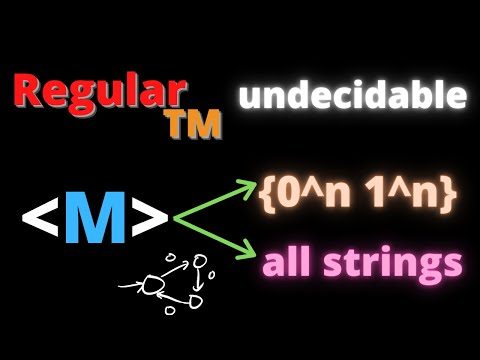

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo('zo3kyFumkws')

I watched it to the end, where our host says we can prove that $CFG_TM$ is undecidable by simply changing the auto-accpet language to $0^n1^n2^n$. I suppose we can also use the language $A\Sigma{}A$ where $A \in \Sigma^*$

M'(x) {

  if x is of the form $A\Sigma{}A$ where $A \in \Sigma^*$, goto accept_M';
  
  Run M on w ;
  
  If M accepts w, goto accept_M';
  
  If M rejecs w, goto reject_M' ;}`

  $Decider_{Regular_{TM}}$(M') = 
accepts -> L(M') is regular, Language is $\Sigma^*$, M accepts w.
rejects -> L(M') is not regular, Language is $A\Sigma{}A$ where $A \in \Sigma^*$, M does not accept w.